# SWIFT VS SWALLOW
> Phân loại chim yến (swift) và chim én (swallow)

In [1]:
from fastai.vision.all import *

In [4]:
!ls

data  fastai_model.ipynb


In [4]:
## Assign a path to our data:
path = Path("/home/ddpham/practice/swift_swallow/data/"); path

Path('/home/ddpham/practice/swift_swallow/data')

In [6]:
Path.BASE_PATH = path
path.ls()

(#3) [Path('train'),Path('models'),Path('test')]

In [7]:
## Check torch device:
torch.cuda.current_device()

0

In [8]:
??ImageDataLoaders

Init signature: ImageDataLoaders(*loaders, path='.', device=None)
Source:        
class ImageDataLoaders(DataLoaders):
    "Basic wrapper around several `DataLoader`s with factory methods for computer vision problems"
    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_folder(cls, path, train='train', valid='valid', valid_pct=None, seed=None, vocab=None, item_tfms=None,
                    batch_tfms=None, **kwargs):
        "Create from imagenet style dataset in `path` with `train` and `valid` subfolders (or provide `valid_pct`)"
        splitter = GrandparentSplitter(train_name=train, valid_name=valid) if valid_pct is None else RandomSplitter(valid_pct, seed=seed)
        get_items = get_image_files if valid_pct else partial(get_image_files, folders=[train, valid])
        dblock = DataBlock(blocks=(ImageBlock, CategoryBlock(vocab=vocab)),
                           get_items=get_items,
                           splitter=splitter,
                           get_y=p

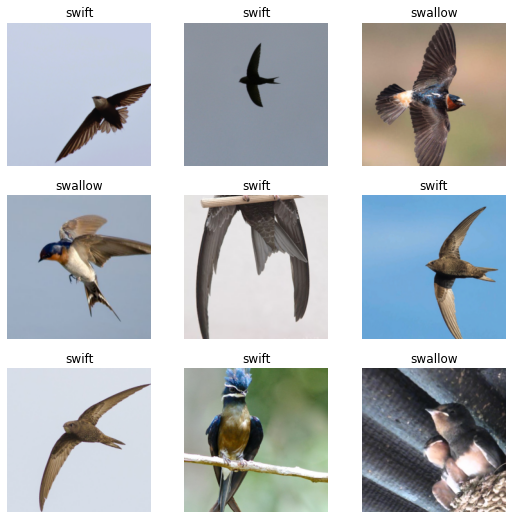

In [9]:
## Create an image data loaders:
bs = 32
dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,
    seed=42, 
    bs=bs, 
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)],
)
dls.show_batch(max_n=9)

**Explaination:**

There're many things that we want do describe based on only 2 lines of code. Here, we want to create a ImageDataLoaders from folder object. This object has a number of properties:

- path: is the folder that is structured as such hierarchy: train/test/valid --> classes: in this case, each sub-folder of this path(data) such as train, we have 2 sub-folders of its: swift & swallow. This is the structure of imagenet way that we store classes of images separately for all train, valid and test sets also in separate folders. ImageDataLoaders have a number of ways of loading the data such as: 
    + from_name_func: basically create a list of file names in a path of which all file names already contains label and we'll need to create a lambda func to extract labels from file name: such as file name as: swift-train-12346.jpg which show class-train/valid/test-image number; or train-1-134556.jpg which shows train-class of 1 as swift-image number.
    + from_path_func: similar as above
    + from_path_re: extract train/test/valid & class from path via regular expression
    + from_name_re: similar as above but with file names.
    + from_df: a DataFrame contains all info about links to train/test/valid & class based on path to each files.
    + form_csv: same as from_df
    + from_lists: from list of file names and lables in the path.
- In this path, we suppose to have train & valid folder to assign for. Currently, we have train folder only an thus, we need to assign that valid set will be taken from train set as of 20% of its. So we input `valid_pct` as our input hyperparameter.
- bs: is batch-size. so each batch we have 64 images to be trained  by default. In this case, we assign batch size to a variable bs with value of 64. This batch-size is related to iteration and one-cyle. In sort 1 iteration is 1 batch-size being trained (or 64 images in this case), 2 iterations means 2 batch-sizes being trained and so on. One-cycle is when all the images of train set is trained. And, batch-size * number of iteration = one-cycle, thus, if we know batch-size, we know number of iterations for one cycle.
- item_tfms: is transformation applied to each image. This can be confused abit with batch_tfms since it's also transformation of images, however, with a batch-size of images (in this case 64 images on one go). The way I understand it is that item_tfms is base transformations we'd want to do to each image: such as to have the same size images. While bath_tfms needs while training with batch-size and per architecture: some do normalization, some do augmentation and so on.
    For this iteam_tfms, we only apply resizng of each images.
- batch_tfms: as mentioned above, we do some transformation for each batch being trained. 
    + Here, we have all augmentation transformation: ash as flip, brightness, randomeResized with 2 specification: size=224 (for requirement of resnet) and min_scale=0.75).
    + We also add normalization to batch_size with default stats from imagenet_stats.


In [2]:
??DataBlock

Init signature:
DataBlock(
    blocks=None,
    dl_type=None,
    getters=None,
    n_inp=None,
    item_tfms=None,
    batch_tfms=None,
    *,
    get_items=None,
    splitter=None,
    get_y=None,
    get_x=None,
)
Source:        
class DataBlock():
    "Generic container to quickly build `Datasets` and `DataLoaders`"
    get_x=get_items=splitter=get_y = None
    blocks,dl_type = (TransformBlock,TransformBlock),TfmdDL
    _methods = 'get_items splitter get_y get_x'.split()
    _msg = "If you wanted to compose several transforms in your getter don't forget to wrap them in a `Pipeline`."
    def __init__(self, blocks=None, dl_type=None, getters=None, n_inp=None, item_tfms=None, batch_tfms=None, **kwargs):
        blocks = L(self.blocks if blocks is None else blocks)
        blocks = L(b() if callable(b) else b for b in blocks)
        self.type_tfms = blocks.attrgot('type_tfms', L())
        self.default_item_tfms  = _merge_tfms(*blocks.attrgot('item_tfms',  L()))
        self.default_

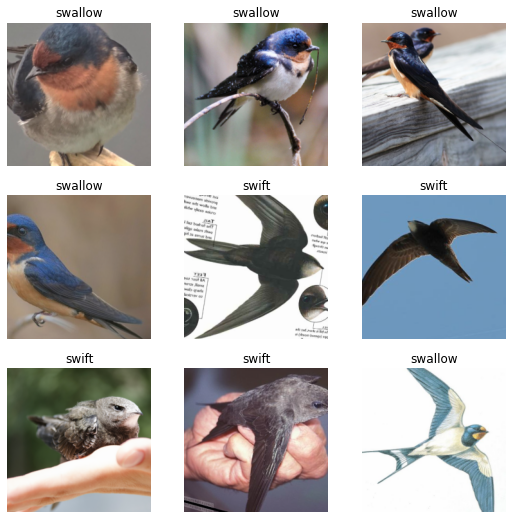

In [9]:
## other way of create a dataloader on top of a datablock:
birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)]
)
dls = birds.dataloaders(path)
dls.show_batch(max_n=9)

In [8]:
print(imagenet_stats)

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])


In [9]:
print(*aug_transforms(size=224, min_scale=0.75))

Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5}:
encodes: (TensorBBox,object) -> encodes
(TensorPoint,object) -> encodes
(TensorImage,object) -> encodes
(TensorMask,object) -> encodes
decodes:  Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}:
encodes: (TensorImage,object) -> encodes
decodes:  RandomResizedCropGPU -- {'size': (224, 224), 'min_scale': 0.75, 'ratio': (1, 1), 'mode': 'bilinear', 'valid_scale': 1.0, 'p': 1.0}:
encodes: (TensorImage,object) -> encodes
decodes: 


Look great isn't it :)). some image we migth see part of the birds, so it's abit harder to predict.

## Training Resnet34:

We'll going to use pretrained model (which is resnet34 here) to train our data. This is big help for us since we dont have to do 2 things: 

1) create a new deep learning architecture every time we train new dataset of new prolem. 
2) fine-tuning architecture (weights of the arc).

Both of these tasks are time-consumming. However, if we can reused state-of-the art arcs with our similar problems, we'd be more accurate and of-course saving tone of our time.

In [10]:
## Create a learner based on ccn_learner method:
learner = cnn_learner(dls, resnet34, metrics=error_rate)

**NOTE:**

Here we create a cnn_learner (convolutional neural network) which is type of deep learning architure that is mostly used for image problems. There a number of things we need to know about this learner:

- dls: dataloader object
- architecture: pretrained model. Here we train with resnet34. If this architecture is not pretrained (we design), we'll need to defind it first, then we'll have to turn of `pretrained` hyperparameter to False in this case.
- metrics: metrics (score) we used to evaluate result of model.
- loss function: here we ignore loss function, however, we'll always need to know what sort of loss function to be use in each case. With binary classification, we'll used binary-cross-entropy loss function. 


In [14]:
## check architecture of the model:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [11]:
## after few run tests, we find that 11 epochs would be most benefit for the model.
learner.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.159122,0.579230,0.234973,00:07
1,0.916244,0.295984,0.120219,00:04
2,0.711527,0.231177,0.071038,00:04
3,0.576708,0.235533,0.065574,00:04
4,0.480765,0.222460,0.076503,00:04
5,0.402606,0.229840,0.076503,00:04
6,0.346476,0.211017,0.071038,00:04
7,0.305634,0.207157,0.071038,00:04
8,0.273661,0.204828,0.065574,00:04
9,0.245254,0.202186,0.065574,00:04


In [12]:
## save result:
learner.save('stage-1')

Path('models/stage-1.pth')

### Check results:

In [13]:
interp = ClassificationInterpretation.from_learner(learner)
losses, idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)

True

In [18]:
?ClassificationInterpretation

Init signature: ClassificationInterpretation(dl, inputs, preds, targs, decoded, losses)
Docstring:      Interpretation methods for classification models.
File:           ~/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/interpret.py
Type:           type
Subclasses:     


In [20]:
??ClassificationInterpretation.from_learner

Signature:
ClassificationInterpretation.from_learner(
    learn,
    ds_idx=1,
    dl=None,
    act=None,
)
Source:   
    @classmethod
    def from_learner(cls, learn, ds_idx=1, dl=None, act=None):
        "Construct interpretation object from a learner"
        if dl is None: dl = learn.dls[ds_idx]
        return cls(dl, *learn.get_preds(dl=dl, with_input=True, with_loss=True, with_decoded=True, act=None))
File:      ~/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/interpret.py
Type:      method


**NOTE:**

In this case, to check results, we'll use ClassificationInterpretation class and its sub-method from_learner to gain all stats from the learner that we've just finished training. And we have a object of interpretation to find more information about it. 

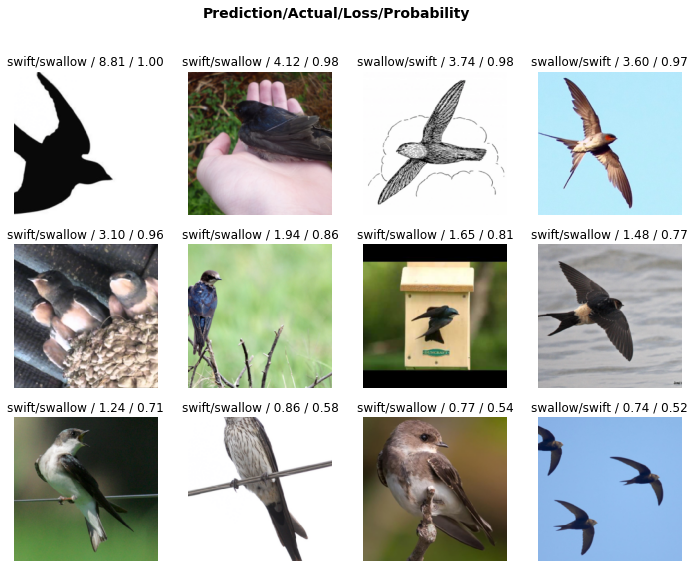

In [16]:
## plot top losses:
interp.plot_top_losses(12)

**NOTE ON LOSSES:**

It looks as if most swallows sit on branches and thus, the model mostly predict bird sitting on braches as swallow. While most swifts fly with wings open wide. Thus, model predicts that most birds fly with open wings are swifts. Some mis-predicted with swallow & swift baby birds.

In [23]:
doc(interp.plot_top_losses)

Interpretation.plot_top_losses [source] Interpretation.plot_top_losses ( k , largest = True , ** kwargs ) 
 
 Show in docs

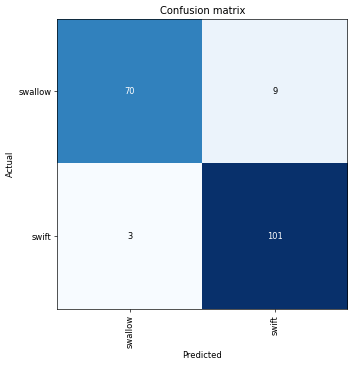

In [15]:
## we further want to check it's score:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

### Unfreezing Pre-trained model, fine-tuning and learning-rate

In [17]:
learner.unfreeze()
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.835648,5.448223,0.382514,00:05


It doesn't look good with new train results after unfreezing pre-trained model.
Let's further find best learning rate here:

In [21]:
learner.load("stage-1")

**NOTE:**

the next step is to find the efficient learning rates that 

SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=9.12010818865383e-07)

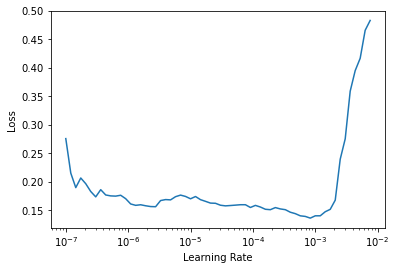

In [22]:
## find best learnig rate:
learner.lr_find()

After finding the right learning rate, let's unfreez it again and retrain it. This time, based on the learning rate finder, we'll slice learning rate between 2e-6 to 1e-4.

In [23]:
learner.unfreeze()
learner.fit_one_cycle(6, lr_max=slice(1e-6,8e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.140789,0.224944,0.060109,00:05
1,0.155556,0.288861,0.060109,00:05
2,0.158139,0.274033,0.081967,00:05
3,0.150515,0.267715,0.087432,00:05
4,0.137551,0.256441,0.076503,00:04
5,0.119532,0.256001,0.071038,00:04


**NOTE:**

It looks like the results look better here. Let's have 6 more circle to see how it'll go, if it's not good, let's reload stage-1 and unfreeze model and fit with less cycles.

In [34]:
# learner.fit_one_cycle(6, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.121329,0.281597,0.085714,00:07
1,0.108418,0.283750,0.085714,00:06
2,0.109942,0.288984,0.091429,00:06
3,0.096244,0.286599,0.091429,00:06
4,0.089894,0.279662,0.091429,00:06
5,0.092233,0.277769,0.097143,00:06


In [24]:
## Save model after unfreeze layers and retrain weights:
learner.save("stage-2")

Path('models/stage-2.pth')

**RE-INTERPRETE THE RESULTS:**

In [25]:
interp_stg2 = ClassificationInterpretation.from_learner(learner)

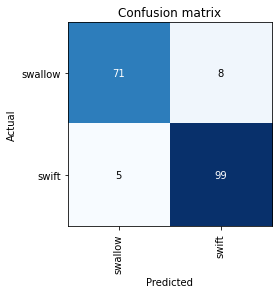

In [26]:
interp_stg2.plot_confusion_matrix()

In [27]:
##accuracy:
(84+87)/(84+87+5+7)

0.9344262295081968

## RESNET-50

In [34]:
learner = cnn_learner(dls, resnet50, metrics=error_rate)

In [35]:
## fit_one_cycle:
learner.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.965112,0.433052,0.131148,00:06
1,0.721527,0.260041,0.136612,00:06
2,0.554176,0.160182,0.060109,00:06
3,0.421401,0.186642,0.071038,00:12
4,0.341353,0.222586,0.071038,00:25
5,0.280021,0.191756,0.076503,00:12
6,0.233592,0.174829,0.071038,00:09
7,0.196609,0.168585,0.076503,00:07


In [36]:
learner.save("stage1-50")

Path('models/stage1-50.pth')

**Find lr:**

In [33]:
??learner.lr_find

Signature:
learner.lr_find(
    start_lr=1e-07,
    end_lr=10,
    num_it=100,
    stop_div=True,
    show_plot=True,
    suggestions=True,
)
Source:   
@patch
def lr_find(self:Learner, start_lr=1e-7, end_lr=10, num_it=100, stop_div=True, show_plot=True, suggestions=True):
    "Launch a mock training to find a good learning rate, return lr_min, lr_steep if `suggestions` is True"
    n_epoch = num_it//len(self.dls.train) + 1
    cb=LRFinder(start_lr=start_lr, end_lr=end_lr, num_it=num_it, stop_div=stop_div)
    with self.no_logging(): self.fit(n_epoch, cbs=cb)
    if show_plot: self.recorder.plot_lr_find()
    if suggestions:
        lrs,losses = tensor(self.recorder.lrs[num_it//10:-5]),tensor(self.recorder.losses[num_it//10:-5])
        if len(losses) == 0: return
        lr_min = lrs[losses.argmin()].item()
        grads = (losses[1:]-losses[:-1]) / (lrs[1:].log()-lrs[:-1].log())
        lr_steep = lrs[grads.argmin()].item()
        return SuggestedLRs(lr_min/10.,lr_steep)
File:      

SuggestedLRs(lr_min=0.00010000000474974513, lr_steep=2.75422871709452e-06)

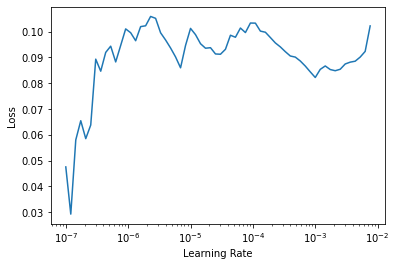

In [37]:
learner.lr_find()

In [37]:
learner.unfreeze()
learner.fit_one_cycle(10, lr_max=slice(6.309573450380412e-07, 0.00043651582673192023))

epoch,train_loss,valid_loss,error_rate,time
0,0.107520,0.220684,0.060109,00:07
1,0.106791,0.267370,0.071038,00:07
2,0.092749,0.272470,0.065574,00:07
3,0.077462,0.214519,0.049180,00:07
4,0.065444,0.239370,0.049180,00:07
5,0.067952,0.207074,0.038251,00:07
6,0.060400,0.189691,0.049180,00:07
7,0.058598,0.186252,0.038251,00:07
8,0.053605,0.183891,0.038251,00:07
9,0.059856,0.192166,0.043716,00:07


In [38]:
learner.save("stage2-50")

Path('models/stage2-50.pth')

In [39]:
interp = ClassificationInterpretation.from_learner(learner)

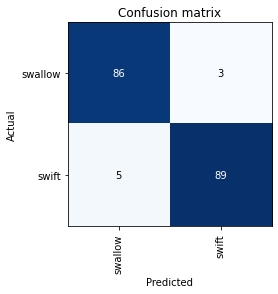

In [40]:
interp.plot_confusion_matrix()

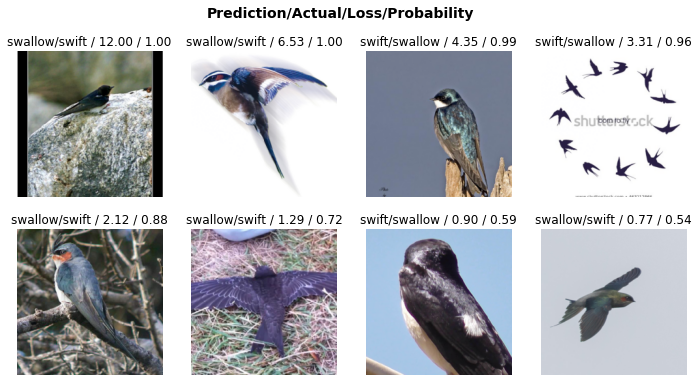

In [41]:
interp.plot_top_losses(8)

**NOTE:**
we can see that it's hard to recognize treeswifts and barn swallow at some views since they have similar shape when they're standing and similar flying style as well.

Let's try some other architectures (newly developed by fastai: xresnet; xresent-deep & xresnet-deeper to see any differences they make to this.

In [43]:
learner.save('stage2-50')

Path('models/stage2-50.pth')

# xRESNET:

In [10]:
learner = cnn_learner(dls, xresnet50, metrics=error_rate)

In [7]:
learner.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.104483,0.665283,0.278689,00:07
1,0.889694,0.648838,0.224044,00:05
2,0.845206,0.605756,0.229508,00:05
3,0.763565,0.548696,0.234973,00:05
4,0.672988,0.513306,0.191257,00:06
5,0.638785,0.471807,0.202186,00:06
6,0.577574,0.430423,0.169399,00:05
7,0.532678,0.451786,0.185792,00:05
8,0.486897,0.443982,0.202186,00:05
9,0.464668,0.451145,0.185792,00:05


In [8]:
interp = ClassificationInterpretation.from_learner(learner)

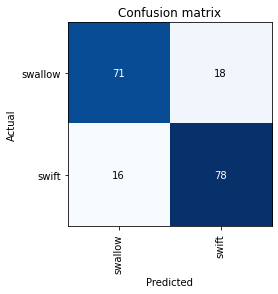

In [9]:
interp.plot_confusion_matrix()

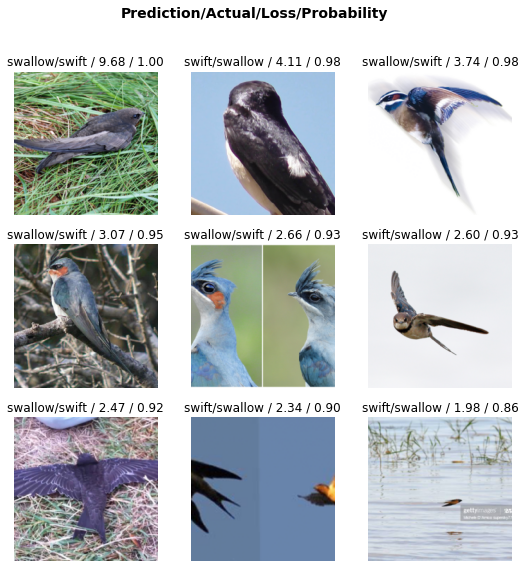

In [10]:
interp.plot_top_losses(9)

In [11]:
learner.save("stage1-x50")

Path('models/stage1-x50.pth')

In [11]:
learner.load("stage1-x50")

SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=1.0964781722577754e-06)

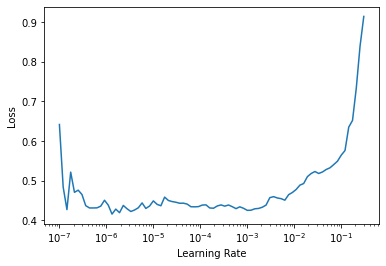

In [12]:
learner.lr_find()

In [13]:
learner.unfreeze()
learner.fit_one_cycle(6, lr_max=slice(9.12010818865383e-07, 1.318256749982538e-07))    

epoch,train_loss,valid_loss,error_rate,time
0,0.438584,0.439873,0.185792,00:08
1,0.427765,0.438531,0.185792,00:07
2,0.431225,0.441008,0.196721,00:07
3,0.418932,0.435654,0.185792,00:07
4,0.421612,0.434449,0.185792,00:07
5,0.422202,0.436851,0.185792,00:07


Based on the training, it doesn't look like xRESNET is good use.

Let's try deep & deeper xRESNET

In [14]:
learner = cnn_learner(dls, xresnet50_deep, metrics=error_rate)

In [22]:
learner.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.234699,0.726292,0.371585,00:06
1,1.113659,0.814082,0.284153,00:06
2,1.025010,1.097317,0.344262,00:06
3,0.916635,0.813829,0.311475,00:05
4,0.817120,0.633078,0.295082,00:05
5,0.779663,0.723271,0.284153,00:05
6,0.727677,0.722286,0.300546,00:05
7,0.657205,0.735125,0.300546,00:05
8,0.595359,0.605385,0.267760,00:05
9,0.553759,0.669066,0.289617,00:05


In [15]:
learner.save("stage1-x50_deep")

Path('models/stage1-x50_deep.pth')

In [23]:
learner.load("stage1-x50_deep")

RuntimeError: Error(s) in loading state_dict for Sequential:
	Missing key(s) in state_dict: "0.10.0.convpath.0.0.weight", "0.10.0.convpath.0.1.weight", "0.10.0.convpath.0.1.bias", "0.10.0.convpath.0.1.running_mean", "0.10.0.convpath.0.1.running_var", "0.10.0.convpath.1.0.weight", "0.10.0.convpath.1.1.weight", "0.10.0.convpath.1.1.bias", "0.10.0.convpath.1.1.running_mean", "0.10.0.convpath.1.1.running_var", "0.10.0.convpath.2.0.weight", "0.10.0.convpath.2.1.weight", "0.10.0.convpath.2.1.bias", "0.10.0.convpath.2.1.running_mean", "0.10.0.convpath.2.1.running_var", "0.11.0.convpath.0.0.weight", "0.11.0.convpath.0.1.weight", "0.11.0.convpath.0.1.bias", "0.11.0.convpath.0.1.running_mean", "0.11.0.convpath.0.1.running_var", "0.11.0.convpath.1.0.weight", "0.11.0.convpath.1.1.weight", "0.11.0.convpath.1.1.bias", "0.11.0.convpath.1.1.running_mean", "0.11.0.convpath.1.1.running_var", "0.11.0.convpath.2.0.weight", "0.11.0.convpath.2.1.weight", "0.11.0.convpath.2.1.bias", "0.11.0.convpath.2.1.running_mean", "0.11.0.convpath.2.1.running_var". 

SuggestedLRs(lr_min=5.754399353463669e-07, lr_steep=7.585775847473997e-07)

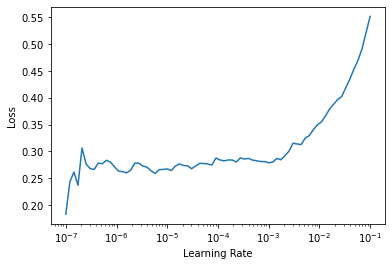

In [22]:
learner.lr_find()

In [17]:
learner.unfreeze()
learner.fit_one_cycle(10, lr_max=slice(1.0964781722577754e-06, 0.0003019951749593019))

epoch,train_loss,valid_loss,error_rate,time
0,1.236704,0.720743,0.333333,00:07
1,1.050963,0.719384,0.289617,00:07
2,0.990046,0.801886,0.322404,00:07
3,0.878589,0.678884,0.278689,00:07
4,0.822276,0.729805,0.278689,00:07
5,0.803536,0.592342,0.267760,00:07
6,0.755065,0.605545,0.251366,00:07
7,0.702199,0.624822,0.251366,00:07
8,0.649588,0.612735,0.262295,00:07
9,0.621836,0.624145,0.284153,00:07


In [18]:
learner = cnn_learner(dls, xresnet50_deeper, metrics=error_rate)

In [20]:
learner.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,0.465155,0.625097,0.273224,00:06
1,0.450099,0.606127,0.278689,00:06
2,0.476388,0.603168,0.240437,00:05
3,0.507000,0.725743,0.349727,00:06
4,0.516499,0.674369,0.240437,00:06
5,0.496295,0.673164,0.234973,00:05
6,0.489760,0.768032,0.278689,00:05
7,0.486999,0.644809,0.267760,00:06
8,0.468935,0.759174,0.240437,00:06
9,0.459300,0.726533,0.240437,00:05
